In [5]:
%%HTML
<style = 'text/css'>
table.dataframe th, table.dataframe td{
    border: 1px black solid !important;
    color: black !important;
}

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> From the above data we observe that `Age` column has **177** missing value.

> We will be imputing these values as per standard mean.

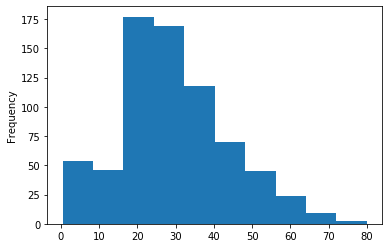

In [17]:
df['Age'].plot(kind='hist');

In [18]:
df['Age'].mean()

29.69911764705882

In [20]:
df['Age'].fillna(value=30, inplace=True)

# Performing EDA (Exploratory Data Analysis)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
plt.style.use('seaborn')

In [37]:
df_tmp = df.groupby('Pclass').sum()

In [38]:
df_tmp


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,8011.42,90,77,18177.4125
2,82056,87,5498.83,74,70,3801.8417
3,215625,119,13004.92,302,193,6714.6951


In [57]:
df_tmp2 = df.groupby('Sex').sum()

In [58]:
df_tmp2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,8876.00,218,204,13966.6628
male,262043,109,1379,17639.17,248,136,14727.2865


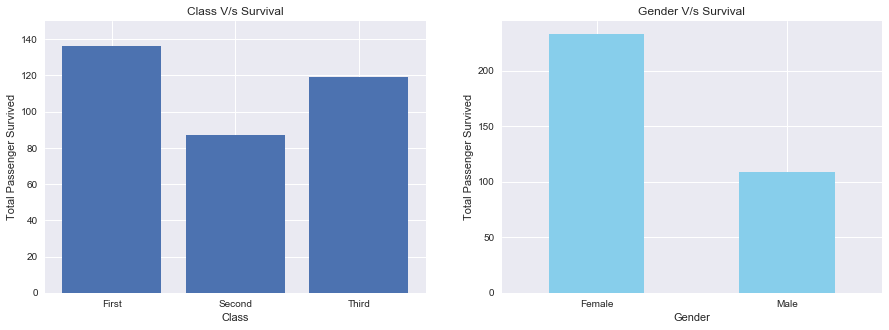

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].bar(df_tmp.index,df_tmp['Survived'])
ax[0].set_xticks([1,2,3])
ax[0].set_xticklabels(['First','Second','Third'])
ax[0].set_ylim(0,150)
ax[0].set(xlabel = 'Class',
          ylabel = 'Total Passenger Survived',
          title = 'Class V/s Survival')

ax[1] = df_tmp2['Survived'].plot(kind='bar', color='skyblue')
ax[1].set(xlabel = 'Gender',
       ylabel = 'Total Passenger Survived',
       title = 'Gender V/s Survival')
ax[1].set_xticklabels(['Female','Male'])



plt.xticks(rotation=360);

## Observations from above plots.

### Plot-1 (Class V/s Survival)
* Average number of passengers survived from each class are approx 113.
* Survival rates of each class are as following-:
    1. First class = 62%
    2. Second class = 47%
    3. Third class = 24.2%

### PLot-2 (Gender V/s Survival)
* We observe significant difference in survival rate of both genders.
* Survival rates are as follows-:
    1. Female = 74.20%
    2. Male = 18.89%

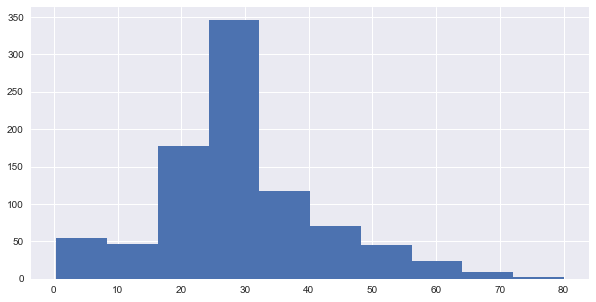

In [103]:
df['Age'].hist(figsize=(10,5));
#There is spike in the value 30, as we have imputed this value.

## Observations form above plot

* Majority of the age group travelled in titanic was: **Age group (15-35)**
    

In [101]:
df_tmp = df.groupby('Parch').sum()

In [102]:
df_tmp

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,301883,233,1574,21475.00,161,17347.8325
1,54883,65,260,2926.42,128,5519.8252
2,33333,40,182,1530.75,165,5147.0083
3,2896,3,13,166.00,5,129.7583
4,1536,0,10,178.00,3,339.8750
5,2176,1,15,196.00,3,162.7500
6,679,0,3,43.00,1,46.9000


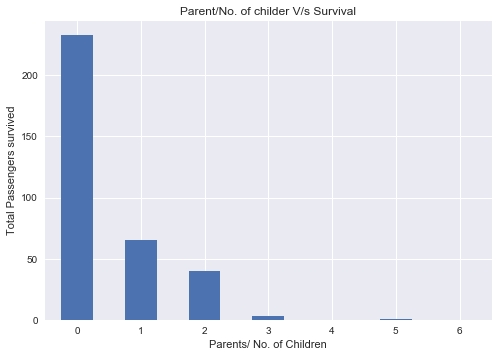

In [116]:
fig, ax = plt.subplots()

ax = df_tmp['Survived'].plot(kind='bar')

ax.set(xlabel = 'Parents/ No. of Children',
       ylabel = 'Total Passengers survived',
       title = 'Parent/No. of childer V/s Survival')

plt.xticks(rotation=360);

## Observation from above plot

* Passengers without having there Parents/Children onboard had highest survival rate.
* Followed by passengers who had one or two Parent/Children onboard.
